# Simple example of Normalization for regression

In [56]:
import numpy as np
from numpy.linalg import pinv #pseudo Inverse

file_path = 'data/house_price.txt' # Reading data from a file
data = np.loadtxt(file_path, delimiter=',')

x = data[: , 0]
X = np.zeros((41,2))
X[: , 0] =  1
X[: , 1] =  x # Creating Feature Matrix

y= data[: , 1]
Y = np.zeros((41,1))
Y[: , 0] =  y

tetha = np.zeros((2,1))

tetha = pinv(X)@Y # calculating Tetha using Normalization
print(tetha)
Z = X @ tetha
z = Z[: , 0]


[[988.29469769]
 [  1.16287707]]


# Ploting Data and Regression

/tmp/ipykernel_34287/2572704675.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ob" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(x, y, "ob", marker='+' )
/tmp/ipykernel_34287/2572704675.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ob" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, z, "ob", color ='r' )


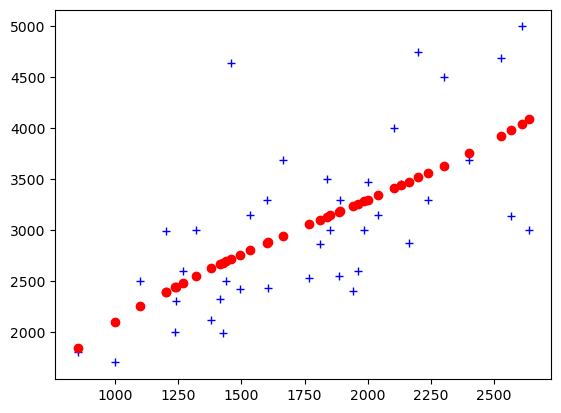

In [63]:
import matplotlib.pyplot as plt

plt.plot(x, y, "ob", marker='+' )
plt.plot(x, z, "ob", color ='r' )



[[-4.28512781e+02]
 [ 3.70007169e+00]
 [-1.43456669e-03]
 [ 2.58125741e-07]]


/tmp/ipykernel_34287/1977633179.py:19: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ob" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(x, y, "ob", marker='+' )
/tmp/ipykernel_34287/1977633179.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ob" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, z, "ob", color ='r' )


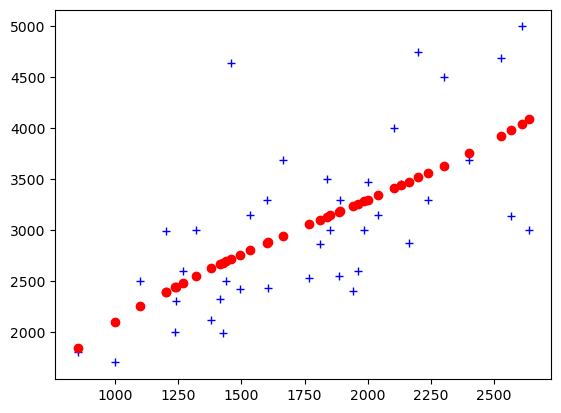

In [62]:
x = data[: , 0]
X = np.zeros((41,4))
X[: , 0] =  1
X[: , 1] =  x
X[: , 2] =  (x**2)
X[: , 3] =  (x**3) # Creating Feature Matrix

y= data[: , 1]
Y = np.zeros((41,1))
Y[: , 0] =  y

tetha = np.zeros((4,1))

tetha = pinv(X)@Y # calculating Tetha using Normalization
print(tetha)
Z = X @ tetha
z = Z[: , 0]

plt.plot(x, y, "ob", marker='+' )
plt.plot(x, z, "ob", color ='r' )